# Validating Vader without stopword cleaning

since this classifier perfomed the best on testing-data and training-data

In [1]:
import pandas as pd # for data processing
import matplotlib.pyplot as plt # to create stat and visualize data
import matplotlib as mpl # to visualize data
import seaborn as sns # to visualize data
from sklearn.metrics import * # calculation of metrics for validation purposes 
import nltk # importing nltk            
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # importing vader classifier

setting to show full text content

In [2]:
pd.set_option('display.max_colwidth', None)

## Loading data

In [3]:
df_vader_with_stopwords = pd.read_csv('../../Data-Preparation/twitter-corpus/full_corpus_preprocessed.csv')

In [4]:
df_vader_with_stopwords

,Ground_Truth_Label,Text,target_number
0,positive,Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is,4
1,positive,@Apple will be adding more carrier support to the iPhone 4S (just announced),4
2,positive,Hilarious @youtube video - guy does a duet with @apple 's Siri. Pretty much sums up the love affair! http://t.co/8ExbnQjY,4
3,positive,@RIM you made it too easy for me to switch to @Apple iPhone. See ya!,4
4,positive,I just realized that the reason I got into twitter was ios5 thanks @apple,4
...,...,...,...
1033,negative,@joannejacobs I'd like to criticise #Microsoft's Steve Ballmer face-to-face for all the pain & suffering their products cause. #justsaying,0
1034,negative,@zombiebomber have been on the phone with @verizonwireless and @apple pretty much ever since then. Really annoyed.,0
1035,negative,"I gave a try to Windows 8 Dev. Preview and it was good but the UI is way too messy right now, waiting for the Beta #microsoft #windows8",0
1036,negative,"RT @Jewelz2611 @mashable @apple, iphones r 2 expensive. Most went w/ htc/galaxy. No customer loyalty w/phone comp..",0


In [5]:
df_vader_with_stopwords['Ground_Truth_Label'].value_counts()

Ground_Truth_Label
positive    519
negative    519
Name: count, dtype: int64

## Classifying sentiments 

SentimentIntensityAnalyzer gets imported that containes a pre-defined ruleset for sentiment analyzation. A sentiment score gets calculated from that and the value 0.00 is chosen to differ between positive and negative sentiment.

In [6]:
analyzer = SentimentIntensityAnalyzer()

In [7]:
def classify_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.00:
        return 'positive'
    else: 
        return 'negative'

In [8]:
df_vader_with_stopwords['VADER_Classification'] = df_vader_with_stopwords['Text'].apply(classify_sentiment)

In [9]:
df_vader_with_stopwords

,Ground_Truth_Label,Text,target_number,VADER_Classification
0,positive,Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is,4,positive
1,positive,@Apple will be adding more carrier support to the iPhone 4S (just announced),4,positive
2,positive,Hilarious @youtube video - guy does a duet with @apple 's Siri. Pretty much sums up the love affair! http://t.co/8ExbnQjY,4,positive
3,positive,@RIM you made it too easy for me to switch to @Apple iPhone. See ya!,4,positive
4,positive,I just realized that the reason I got into twitter was ios5 thanks @apple,4,positive
...,...,...,...,...
1033,negative,@joannejacobs I'd like to criticise #Microsoft's Steve Ballmer face-to-face for all the pain & suffering their products cause. #justsaying,0,negative
1034,negative,@zombiebomber have been on the phone with @verizonwireless and @apple pretty much ever since then. Really annoyed.,0,positive
1035,negative,"I gave a try to Windows 8 Dev. Preview and it was good but the UI is way too messy right now, waiting for the Beta #microsoft #windows8",0,negative
1036,negative,"RT @Jewelz2611 @mashable @apple, iphones r 2 expensive. Most went w/ htc/galaxy. No customer loyalty w/phone comp..",0,negative


## Testing quality of the classifier on validation data

In [10]:
accuracy = accuracy_score(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'])
precision = precision_score(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'], pos_label='positive')
recall = recall_score(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'], pos_label='positive')
f1 = f1_score(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'], pos_label='positive')

beta = 1 / (2**0.5)
f_beta = fbeta_score(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'],beta=beta, pos_label='positive')


In [11]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f"F-beta Score (beta={beta}): {f_beta}")

Accuracy: 0.73
Precision: 0.67
Recall: 0.90
F1 Score: 0.77
F-beta Score (beta=0.7071067811865475): 0.7347258485639687


In [12]:
print("\nClassification Report:\n")
print(classification_report(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'], target_names=['negative', 'positive']))


Classification Report:

              precision    recall  f1-score   support

    negative       0.85      0.56      0.68       519
    positive       0.67      0.90      0.77       519

    accuracy                           0.73      1038
   macro avg       0.76      0.73      0.72      1038
weighted avg       0.76      0.73      0.72      1038



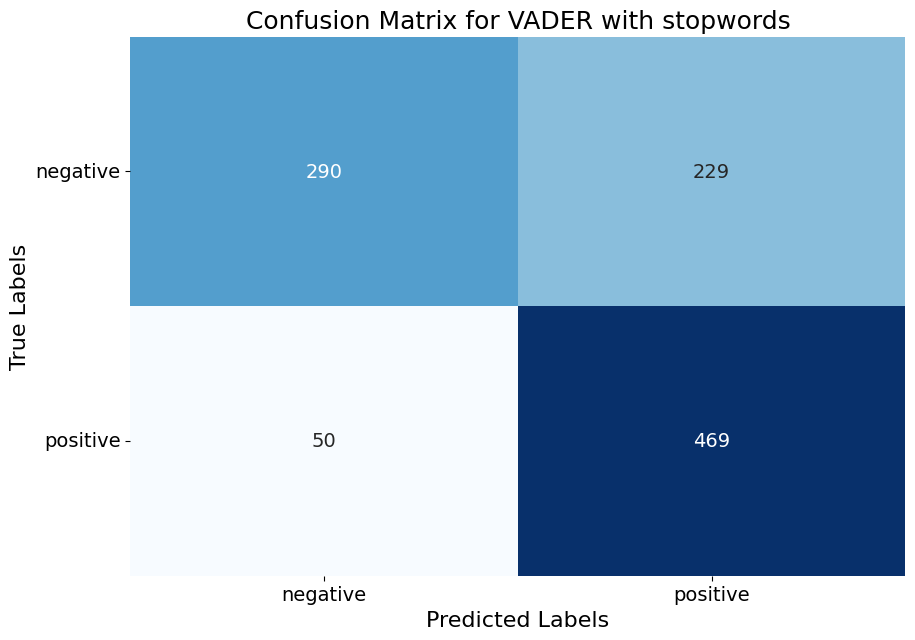

In [13]:
cm_nb = confusion_matrix(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'])
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for VADER with stopwords', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()